In [1]:
!pip3 install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.4 MB 40.5 MB/s 
     |████████████████████████████████| 260 kB 54.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 4.3 MB 37.7 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=bf06124dbc69b604edeacd9462aefda16ac8a731d93eb9a10b13d4313edf0f7e
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/ca63ad74b90273f9a682028d187645a42dce5c5255228d46c8
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=1d85fd0075e8a98e7706f35d3ee5f9fa59710511943079dcd03f156145a1fe67
  Sto

In [3]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import sklearn.metrics
import autosklearn.classification
import autosklearn.metrics
import time

In [4]:
TrainDataSet= pd.read_csv('../content/milknew.csv')
TrainDataSet.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
input_cols = TrainDataSet.columns[:-1]
input_cols

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')

In [6]:
target_col =  TrainDataSet.columns[-1]
target_col

'Grade'

In [7]:
inputs_df = TrainDataSet[list(input_cols)].copy()
inputs_df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [8]:
targets = TrainDataSet[(target_col)]
targets

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

In [9]:
X = inputs_df
y = targets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state=1)

In [10]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=100,
    per_run_time_limit=10
)

In [11]:
start = time.time()
history = automl.fit(X_train, y_train, dataset_name="Mobile-Price-Classification")
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 96.25197291374207s


In [12]:
predictions = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 1.0


In [13]:
automl.show_models()

{2: {'model_id': 2,
  'rank': 1,
  'cost': 0.0035714285714285587,
  'ensemble_weight': 0.1,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f955b0d2050>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f955b094950>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f955b094c90>,
  'sklearn_classifier': RandomForestClassifier(max_features=2, n_estimators=512, n_jobs=1,
                         random_state=1, warm_start=True)},
 3: {'model_id': 3,
  'rank': 2,
  'cost': 0.1607142857142857,
  'ensemble_weight': 0.06,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f955b09fc10>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f955b0

In [14]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,0.10,random_forest,0.003571,2.261252
11,3,0.04,gradient_boosting,0.003571,1.848443
24,2,0.04,gradient_boosting,0.003571,1.984131
16,5,0.08,extra_trees,0.007143,1.995298
18,4,0.10,random_forest,0.007143,2.378829
26,6,0.02,gradient_boosting,0.007143,2.423158
25,7,0.08,libsvm_svc,0.010714,1.183551
8,8,0.02,random_forest,0.014286,2.579435
7,9,0.06,liblinear_svc,0.021429,1.484595


In [15]:
y_pred = automl.predict(X_test)
y_test = np.array(y_test)

error = 0;

for i in range(len(y_test)):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  if(y_test[i] != y_pred[i]):
    error = error + 1;
  print("---------------------------------- ")

error_rate = error  / len(y_test) 
print("Error: ",error_rate)

valor real:  medium
valor estimado:  medium
---------------------------------- 
valor real:  low
valor estimado:  low
---------------------------------- 
valor real:  high
valor estimado:  high
---------------------------------- 
valor real:  low
valor estimado:  low
---------------------------------- 
valor real:  high
valor estimado:  high
---------------------------------- 
valor real:  medium
valor estimado:  medium
---------------------------------- 
valor real:  low
valor estimado:  low
---------------------------------- 
valor real:  low
valor estimado:  low
---------------------------------- 
valor real:  high
valor estimado:  high
---------------------------------- 
valor real:  low
valor estimado:  low
---------------------------------- 
valor real:  high
valor estimado:  high
---------------------------------- 
valor real:  medium
valor estimado:  medium
---------------------------------- 
valor real:  high
valor estimado:  high
---------------------------------- 
valor real

In [16]:
pd.DataFrame(automl.cv_results_)

,mean_test_score,rank_test_scores,mean_fit_time,params,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
0,0.996429,1,2.261252,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.839286,20,2.171972,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,feature_type,select_percentile_classification,...,0.742792,0.011622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.760714,22,2.269167,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,random_forest,feature_type,liblinear_svc_preprocessor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.903571,19,3.084949,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,gradient_boosting,feature_type,select_percentile_classification,...,0.813594,0.034129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.782143,21,1.392609,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,passive_aggressive,feature_type,select_rates_classification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fpr
5,0.978571,14,1.484595,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,liblinear_svc,feature_type,polynomial,...,0.803164,0.275561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.985714,12,2.579435,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,feature_type,polynomial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.664286,24,4.939335,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,mlp,feature_type,feature_agglomeration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.996429,1,2.547877,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,extra_trees,feature_type,polynomial,...,0.730562,0.255960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.996429,1,1.848443,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,gradient_boosting,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


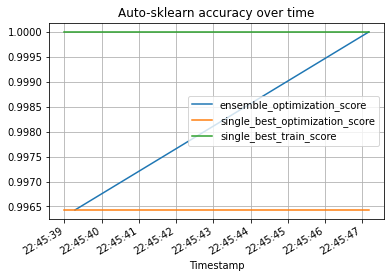

In [17]:
poT = automl.performance_over_time_
poT.plot(
    x="Timestamp",
    kind="line",
    legend=True,
    title="Auto-sklearn accuracy over time",
    grid=True,
)
plt.show()